# Project: Investigate a Dataset (TMDb Movie Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this data analysis work we will consider the TMDB movie data set. A set with approximately 10,000 films. The questions we want to answer cover which genres are most popular over the years; what kind of property can we associate with movies whose revenue is high and, finally, we want to know if movies *homepages* can influence popularity?


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set()
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

* Through the result of the info function, executed below, it can be concluded that there are columns with null values. For example the columns: cast, homepages, and all columns have values below the total entry, 10866.
* In the next command you get the amount of null values. See: df.isnull (). Sum ().
* With the *duplicated* command from pandas, duplicate lines are checked, which should be discarded.

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [3]:
df.sample(4).transpose()

,2175,1791,177,9454
id,31007,22135,250734,380
imdb_id,tt1183923,tt1127221,tt2935476,tt0095953
popularity,0.364652,0.206657,0.842202,1.45982
budget,0,0,0,25000000
revenue,42145,0,30229977,354825435
original_title,Welcome to the Rileys,Not Forgotten,Far from the Madding Crowd,Rain Man
cast,Kristen Stewart|James Gandolfini|Melissa Leo|J...,Simon Baker|Paz Vega|ChloÃ« Grace Moretz|Clair...,Carey Mulligan|Matthias Schoenaerts|Michael Sh...,Dustin Hoffman|Tom Cruise|Valeria Golino|Geral...
homepage,http://www.welcometotherileys-movie.com/,NaN,NaN,NaN
director,Jake Scott,Dror Soref,Thomas Vinterberg,Barry Levinson
tagline,NaN,NaN,NaN,A journey through understanding and fellowship.


A small random sample reveals that some information is missing and there are character display errors (Example: IDs 8107 and 9389). Some movies have the field *revenue* and *budget* zeroed. It is also possible to note that there are multivalued fields like *genres*, *keywords*, *cast*, where the various information is separated by *pipe*.

Note: The above result has been transposed to facilitate viewing of all fields.

In [4]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

It is possible to notice in the previous result that the *genres* field has 23 null registers. Later, we will remove the corresponding records, since gender is an important variable in our analysis.

In [5]:
# verify any duplicate rows in dataset.
sum(df.duplicated())

1

Only one duplicate record was found. This will also be removed.

In [6]:
df[df.revenue == 0].shape

(6016, 21)

Existem **6016** registros cujo *revenue* é zero. Iremos ignorar estes registros também.
From above results, there are **6016** records whose *revenue* is zero. We will ignore these records as well.

### Data Cleaning

In [7]:
df.dropna(subset=['genres'], inplace=True)
df.shape

(10843, 21)

Removed movie records with missing *genres* field.

In [8]:
df = df[df.revenue > 0 ]
df.shape

(4850, 21)

Here we remove records with *revenue* (zeroed).

In [9]:
# Check for totally empty rows
df.dropna(how='all').shape != df.shape

False

In [10]:
# verify any duplicate rows in dataset.
sum(df.duplicated())

1

Duplicate record found. The duplication is then removed:

In [11]:
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

In [12]:
#Through the result of the info function, it can be concluded that all columns do not contain null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4849 entries, 0 to 10848
Data columns (total 21 columns):
id                      4849 non-null int64
imdb_id                 4849 non-null object
popularity              4849 non-null float64
budget                  4849 non-null int64
revenue                 4849 non-null int64
original_title          4849 non-null object
cast                    4844 non-null object
homepage                1665 non-null object
director                4848 non-null object
tagline                 4385 non-null object
keywords                4614 non-null object
overview                4849 non-null object
runtime                 4849 non-null int64
genres                  4849 non-null object
production_companies    4753 non-null object
release_date            4849 non-null object
vote_count              4849 non-null int64
vote_average            4849 non-null float64
release_year            4849 non-null int64
budget_adj              4849 non-null flo

You can still see some null fields. With the exception of *homepage*, all other null fields will not be considered in this investigation and will be excluded as follows:

In [13]:
df.drop(['tagline','keywords', 'production_companies','director'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4849 entries, 0 to 10848
Data columns (total 17 columns):
id                4849 non-null int64
imdb_id           4849 non-null object
popularity        4849 non-null float64
budget            4849 non-null int64
revenue           4849 non-null int64
original_title    4849 non-null object
cast              4844 non-null object
homepage          1665 non-null object
overview          4849 non-null object
runtime           4849 non-null int64
genres            4849 non-null object
release_date      4849 non-null object
vote_count        4849 non-null int64
vote_average      4849 non-null float64
release_year      4849 non-null int64
budget_adj        4849 non-null float64
revenue_adj       4849 non-null float64
dtypes: float64(4), int64(6), object(7)
memory usage: 681.9+ KB


In [14]:
# convert budget and revenue columns to float
df['budget'] = df['budget'].astype('float')
df['revenue'] = df['revenue'].astype('float')
df.describe()


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,4849.000000,4849.000000,4.849000e+03,4.849000e+03,4849.000000,4849.000000,4849.000000,4849.000000,4.849000e+03,4.849000e+03
mean,44575.491648,1.045202,2.956961e+07,8.923886e+07,107.968035,436.283151,6.149000,2000.919777,3.516208e+07,1.151009e+08
std,72368.860461,1.356752,4.051761e+07,1.620801e+08,21.113779,806.485754,0.798707,11.569650,4.376117e+07,1.988557e+08
min,5.000000,0.001117,0.000000e+00,2.000000e+00,15.000000,10.000000,2.100000,1960.000000,0.000000e+00,2.370705e+00
25%,8285.000000,0.387740,1.700000e+06,7.732325e+06,95.000000,46.000000,5.600000,1994.000000,2.329409e+06,1.046585e+07
50%,12154.000000,0.680581,1.500000e+07,3.185308e+07,104.000000,147.000000,6.200000,2004.000000,2.032801e+07,4.395666e+07
75%,43959.000000,1.210502,4.000000e+07,9.996575e+07,117.000000,435.000000,6.700000,2010.000000,4.973516e+07,1.316482e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [15]:
# save clean data
df.to_csv('movie-data.csv', index=False)

We created a file with clean data: `movie-data.csv`

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1: Quais gêneros são mais populares ao longo dos anos?

To addresses thiss question, we need realize some steps:
* get all genres without duplication;
* Create a new dataframe with column genres from previous step, so we can get movies by genres;
* Group movies year by five years;


In [16]:
gen_splitted = [gs.split('|') for gs in df.genres.unique()]
genres = set([g for gs in gen_splitted for g in gs])
print(genres)

{'Fantasy', 'Action', 'Mystery', 'Comedy', 'Crime', 'Documentary', 'Western', 'History', 'Foreign', 'Drama', 'Animation', 'Adventure', 'Music', 'War', 'Romance', 'Horror', 'Family', 'Science Fiction', 'TV Movie', 'Thriller'}


The set **genres** obtained contains all genres found. Now it is necessary to group the films in each genre.

In [17]:
# make movie by genre
movie_groups = []
for g in genres:    
    movie_gen = df[df.genres.str.contains(g)][['popularity', 'release_year', 'genres','revenue']]
    movie_gen['genres_1'] = np.repeat(g, movie_gen.shape[0])
    movie_groups.append(movie_gen)

movies = pd.concat(movie_groups)
movies.head(2)

,popularity,release_year,genres,revenue,genres_1
3,11.173104,2015,Action|Adventure|Science Fiction|Fantasy,2.068178e+09,Fantasy
11,6.189369,2015,Science Fiction|Fantasy|Action|Adventure,1.839877e+08,Fantasy


To facilitate analysis we will group the films every 5 years and check the average of the popularity:

In [18]:
# set lustrum field (period of five years)

period = 5
movies['lustrum'] = (movies.release_year // period)*period
movies.head(4)

,popularity,release_year,genres,revenue,genres_1,lustrum
3,11.173104,2015,Action|Adventure|Science Fiction|Fantasy,2.068178e+09,Fantasy,2015
11,6.189369,2015,Science Fiction|Fantasy|Action|Adventure,1.839877e+08,Fantasy,2015
18,5.556818,2015,Romance|Fantasy|Family|Drama,5.423514e+08,Fantasy,2015
37,3.339135,2015,Adventure|Animation|Comedy|Family|Fantasy,3.319261e+08,Fantasy,2015


In [19]:
# average popularity by lustrum
pivot_table = pd.pivot_table(movies, values='popularity', index=['lustrum'], columns=['genres_1'], aggfunc='mean')
pivot_table

genres_1,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
lustrum,,,,,,,,,,,,,,,,,,,,
1960,1.500367,1.827838,2.631987,0.938070,0.741079,NaN,0.796239,0.999265,1.987819,NaN,0.753349,1.034079,0.931615,0.573544,0.710853,NaN,NaN,1.955844,1.199529,0.769762
1965,0.980355,1.172310,2.550704,0.917042,0.752185,NaN,0.657636,1.184698,0.241283,NaN,0.690924,0.724527,0.600345,1.203608,0.692549,1.178658,NaN,0.981700,0.603066,0.573502
1970,0.587404,0.798782,2.104724,0.607834,0.959113,0.029670,0.812207,1.755999,1.407273,NaN,0.474831,1.458410,0.420142,0.768832,0.410233,1.111263,NaN,0.802186,0.417715,0.395489
1975,1.260937,1.279633,0.654268,0.635279,0.724527,0.064029,0.699907,0.588169,0.719617,NaN,0.797715,0.980788,0.629629,0.547183,0.609931,1.550173,NaN,0.940305,1.156599,0.303817
1980,1.031243,1.170096,0.538428,0.704059,0.665240,0.351799,0.603874,0.978349,0.735961,0.148192,0.629624,0.613330,0.511719,0.464588,0.542461,1.145325,NaN,0.733800,0.688868,0.243985
1985,0.856970,1.012299,1.335978,0.671599,0.571668,0.168545,0.593510,0.876790,0.733901,0.077948,0.550389,0.505978,0.498092,0.468399,0.585325,0.871193,NaN,0.676806,0.840255,0.619817
1990,0.807403,0.947222,1.295850,0.702961,0.983848,0.233812,0.682160,0.947814,0.974657,0.289664,0.754725,0.566747,0.711961,0.658787,0.705771,0.873951,NaN,0.797536,0.881771,0.794337
1995,1.060483,1.144319,1.458253,0.724390,0.972304,0.248277,0.819076,1.044532,1.168953,0.195606,0.785814,0.820874,0.556169,1.015024,0.706677,1.214455,0.273628,0.992004,0.872232,0.710569
2000,1.239533,1.552073,1.445014,0.874149,0.915177,0.256732,0.823599,1.405372,2.309673,0.222396,0.915827,0.857811,0.689354,0.934911,0.882684,1.328103,NaN,0.971859,1.177404,0.828279


It is notable that the *Foreign* and *TV Movie* genres have incomplete data and therefore we can exclude these columns:

In [20]:
# Removes columns with empty values
pivot_table.drop(columns=['Foreign', 'TV Movie'], inplace=True)
pivot_table

genres_1,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
lustrum,,,,,,,,,,,,,,,,,,
1960,1.500367,1.827838,2.631987,0.938070,0.741079,NaN,0.796239,0.999265,1.987819,0.753349,1.034079,0.931615,0.573544,0.710853,NaN,1.955844,1.199529,0.769762
1965,0.980355,1.172310,2.550704,0.917042,0.752185,NaN,0.657636,1.184698,0.241283,0.690924,0.724527,0.600345,1.203608,0.692549,1.178658,0.981700,0.603066,0.573502
1970,0.587404,0.798782,2.104724,0.607834,0.959113,0.029670,0.812207,1.755999,1.407273,0.474831,1.458410,0.420142,0.768832,0.410233,1.111263,0.802186,0.417715,0.395489
1975,1.260937,1.279633,0.654268,0.635279,0.724527,0.064029,0.699907,0.588169,0.719617,0.797715,0.980788,0.629629,0.547183,0.609931,1.550173,0.940305,1.156599,0.303817
1980,1.031243,1.170096,0.538428,0.704059,0.665240,0.351799,0.603874,0.978349,0.735961,0.629624,0.613330,0.511719,0.464588,0.542461,1.145325,0.733800,0.688868,0.243985
1985,0.856970,1.012299,1.335978,0.671599,0.571668,0.168545,0.593510,0.876790,0.733901,0.550389,0.505978,0.498092,0.468399,0.585325,0.871193,0.676806,0.840255,0.619817
1990,0.807403,0.947222,1.295850,0.702961,0.983848,0.233812,0.682160,0.947814,0.974657,0.754725,0.566747,0.711961,0.658787,0.705771,0.873951,0.797536,0.881771,0.794337
1995,1.060483,1.144319,1.458253,0.724390,0.972304,0.248277,0.819076,1.044532,1.168953,0.785814,0.820874,0.556169,1.015024,0.706677,1.214455,0.992004,0.872232,0.710569
2000,1.239533,1.552073,1.445014,0.874149,0.915177,0.256732,0.823599,1.405372,2.309673,0.915827,0.857811,0.689354,0.934911,0.882684,1.328103,0.971859,1.177404,0.828279


In [21]:
pivot_table.describe()

genres_1,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
count,12.000000,12.000000,12.000000,12.000000,12.000000,10.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,11.000000,12.000000,12.000000,12.000000
mean,1.457855,1.684044,1.629244,0.877583,1.024178,0.216046,0.844173,1.290825,1.420601,0.862793,0.871477,0.701275,0.963247,0.785912,1.774944,1.216508,1.033574,1.066183
std,1.132246,1.221697,0.676118,0.320193,0.585424,0.101677,0.316596,0.572982,0.806409,0.409810,0.279470,0.216524,0.539750,0.337827,1.537389,0.732094,0.406813,1.408559
min,0.587404,0.798782,0.538428,0.607834,0.571668,0.029670,0.593510,0.588169,0.241283,0.474831,0.505978,0.420142,0.464588,0.410233,0.871193,0.676806,0.417715,0.243985
25%,0.949509,1.111314,1.325946,0.695120,0.736941,0.184862,0.676029,0.970715,0.735446,0.675599,0.696728,0.545056,0.566954,0.603779,1.128294,0.801024,0.802408,0.528999
50%,1.150008,1.225972,1.473551,0.793809,0.931245,0.244069,0.798095,1.114615,1.288113,0.763797,0.839342,0.659491,0.851872,0.706224,1.214455,0.976780,0.989607,0.740165
75%,1.342159,1.621015,2.166664,0.922299,0.975190,0.256150,0.820207,1.453536,2.036143,0.827243,0.994111,0.827399,1.071286,0.868684,1.478101,1.155608,1.182936,0.802823
max,4.857300,5.248548,2.631987,1.776127,2.786263,0.351799,1.758922,2.790577,2.946939,2.027768,1.458410,1.176951,2.301307,1.735462,6.168163,3.259221,1.765139,5.446267


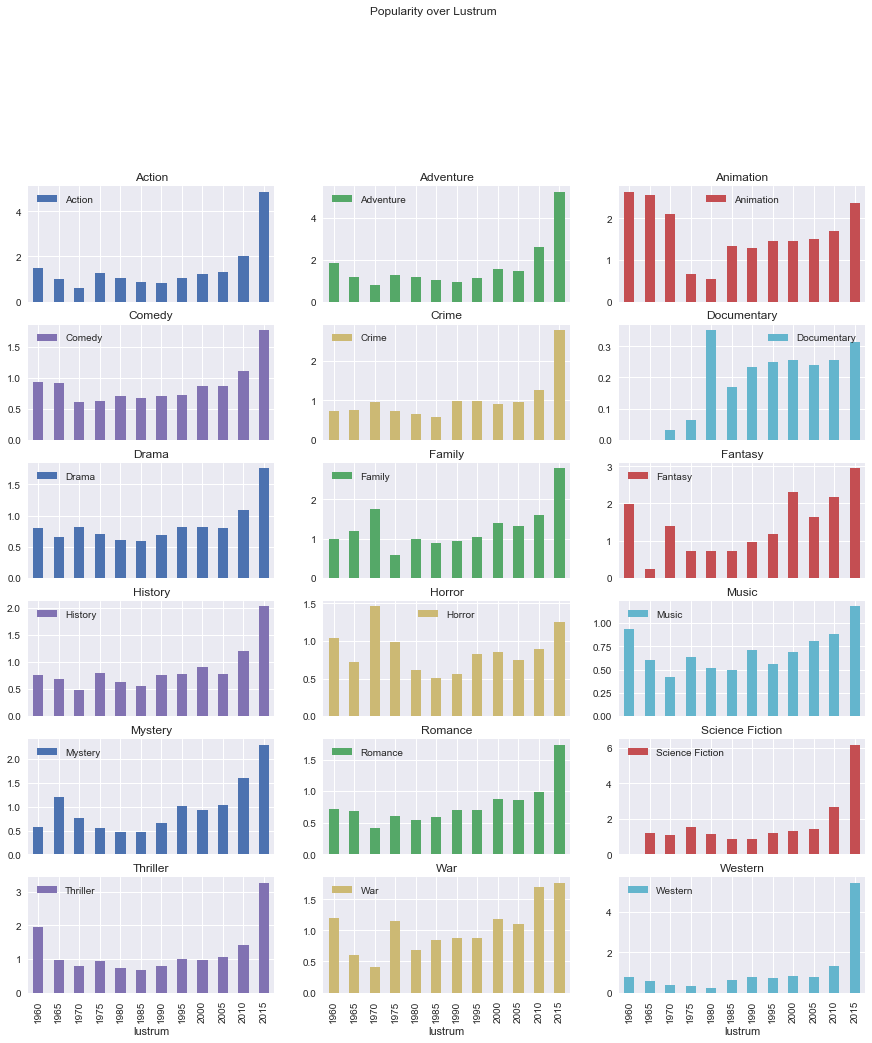

In [22]:
pivot_table.plot(kind='bar',title="Popularity over Lustrum",subplots=True,layout=(10,3),figsize=(15,25));


From the graph above and considering that the most popular have an average polularity close to or greater than 2, we can conclude that these are the most popular genres over the years:
* Adventure, 
* Action, 
* Fantasy, 
* Family, 
* Science Fiction


### Research Question 2 : What kinds of properties are associated with movies that have high revenues?


In [23]:
# get the cleaned file from previous investigation.

df = pd.read_csv('movie-data.csv')

In [24]:
high_revenue = df[df.revenue >= 5e+8]

In this analysis, we will create the column *high_revenue* and establish a floor of half a billion for high-revenue films.

In [25]:
high_revenue.describe()[['popularity','budget','vote_count','vote_average','revenue','release_year']]

,popularity,budget,vote_count,vote_average,revenue,release_year
count,143.000000,1.430000e+02,143.000000,143.000000,1.430000e+02,143.000000
mean,4.630567,1.429626e+08,3166.615385,6.855944,7.951605e+08,2007.503497
std,3.937965,6.574273e+07,1774.860093,0.652581,3.098171e+08,7.397063
min,0.436803,1.050000e+07,48.000000,5.300000,5.001884e+08,1977.000000
25%,2.574915,9.500000e+07,1802.500000,6.400000,5.917672e+08,2004.500000
50%,3.655536,1.450000e+08,2952.000000,6.800000,7.163927e+08,2009.000000
75%,5.588386,1.875000e+08,3980.000000,7.400000,8.887792e+08,2013.000000
max,32.985763,3.800000e+08,9767.000000,8.100000,2.781506e+09,2015.000000


Based on the above results it turns out that popularity, vote_count, vote_average are important factors in a movie's revenue. In the case of popularity, 75% of the films in this category have indices greater than *2.57*. The attributes vote_count and voute_average follow the same analogy; The budget also seems to point in this direction.


In [26]:
# Properties x Revenue

colunas = ['popularity','budget','revenue','genres']
high_revenue[colunas].sort_values('revenue',ascending=False).head(15)

,popularity,budget,revenue,genres
468,9.432768,237000000.0,2.781506e+09,Action|Adventure|Fantasy|Science Fiction
3,11.173104,200000000.0,2.068178e+09,Action|Adventure|Science Fiction|Fantasy
2159,4.355219,200000000.0,1.845034e+09,Drama|Romance|Thriller
1804,7.637767,220000000.0,1.519558e+09,Science Fiction|Action|Adventure
0,32.985763,150000000.0,1.513529e+09,Action|Adventure|Science Fiction|Thriller
4,9.335014,190000000.0,1.506249e+09,Action|Crime|Thriller
14,5.944927,280000000.0,1.405036e+09,Action|Adventure|Science Fiction
1339,5.711315,125000000.0,1.327818e+09,Adventure|Family|Fantasy
2266,6.112766,150000000.0,1.274219e+09,Animation|Adventure|Family
2269,4.946136,200000000.0,1.215440e+09,Action|Adventure|Science Fiction


The table above shows the movies in descending order of revenue. At the top, there are films belonging to the categories *Action*, *Adventure*, *Family*, *Fantasy* corresponding to the most popular genres raised in Question 01. The following table collaborates with the hypothesis. Therefore, according to the findings, the columns: 'popularity', 'budget', 'revenue', 'genres', are properties associated with high revenues.

In [27]:
# Average popularity per quinquennium
pivot_table = pd.pivot_table(movies, values='revenue', index=['lustrum'], columns=['genres_1'], aggfunc='mean')
pivot_table.drop(columns=['Foreign', 'TV Movie'], inplace=True)

pivot_table

genres_1,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
lustrum,,,,,,,,,,,,,,,,,,
1960,4.683375e+07,7.089820e+07,2.158800e+08,2.932763e+07,1.740660e+07,NaN,2.381349e+07,6.869212e+07,1.022727e+08,3.545833e+07,1.166338e+07,4.538602e+07,7.241529e+06,2.535307e+07,NaN,4.583905e+07,2.833507e+07,1.680125e+07
1965,4.946914e+07,5.497285e+07,2.058436e+08,4.062641e+07,3.614536e+07,NaN,4.109169e+07,9.871447e+07,9.000000e+06,4.510296e+07,3.339543e+07,5.975357e+07,3.277724e+07,6.085732e+07,2.573137e+07,5.394322e+07,4.180438e+07,2.266626e+07
1970,4.753188e+07,4.775201e+07,4.386586e+07,5.109957e+07,4.260995e+07,3.000000e+04,5.459715e+07,2.568293e+07,7.500000e+06,4.058707e+07,2.360826e+08,1.180216e+07,1.120480e+07,3.121028e+07,2.995373e+07,6.781757e+07,4.123566e+07,2.890659e+07
1975,8.240798e+07,9.607367e+07,2.860026e+07,5.038993e+07,3.204707e+07,3.219520e+05,5.040916e+07,3.368911e+07,4.894012e+07,3.755676e+07,7.180185e+07,9.081428e+07,3.582741e+07,5.664024e+07,1.110696e+08,6.650853e+07,4.229030e+07,3.387466e+07
1980,7.895857e+07,1.022390e+08,1.311369e+07,5.159473e+07,4.126023e+07,3.351397e+06,3.318467e+07,1.014992e+08,6.612766e+07,3.145645e+07,2.480887e+07,3.793916e+07,1.395828e+07,4.277974e+07,8.167620e+07,3.333443e+07,3.432383e+07,1.304289e+07
1985,6.089890e+07,7.644063e+07,1.058338e+08,5.374784e+07,4.589433e+07,5.892440e+05,5.094895e+07,7.095053e+07,4.437724e+07,2.818941e+07,2.089634e+07,3.239344e+07,2.462573e+07,5.445602e+07,4.206704e+07,4.239041e+07,7.754411e+07,4.141057e+07
1990,7.870549e+07,1.101844e+08,1.180052e+08,6.787294e+07,7.422628e+07,3.696239e+06,6.630357e+07,1.056445e+08,8.634579e+07,7.704995e+07,3.149003e+07,8.522556e+07,9.887268e+07,7.875168e+07,8.646034e+07,8.287946e+07,1.074231e+08,1.245840e+08
1995,1.279372e+08,1.469086e+08,1.562400e+08,7.430431e+07,8.993554e+07,4.637118e+07,7.998950e+07,1.145810e+08,1.162248e+08,1.021024e+08,5.995902e+07,4.882346e+07,1.101062e+08,7.980944e+07,1.197130e+08,1.060188e+08,1.247676e+08,8.982536e+07
2000,1.439228e+08,2.055988e+08,1.876692e+08,9.179982e+07,9.015082e+07,1.653869e+07,7.094733e+07,1.868668e+08,2.703515e+08,1.145744e+08,8.340313e+07,5.688990e+07,8.201447e+07,7.402828e+07,1.495019e+08,9.669299e+07,1.403604e+08,7.345868e+07


### Research Question 3: Movies that have homepages are usually more popular?

In [28]:
popPage = ['popularity', 'homepage']
df[popPage].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4849 entries, 0 to 4848
Data columns (total 2 columns):
popularity    4849 non-null float64
homepage      1665 non-null object
dtypes: float64(1), object(1)
memory usage: 75.8+ KB


In the above summary we see that only 34% of the movies have homepage. We can now compare the average popularity of movies with homepage and movies without homepage. For this we can separate them into two groups.

In [29]:
semHomepage = df[df.homepage.isnull()]
comHomePage = df[df.homepage.notnull()]
print('With Homepage:{}  Without Homepage: {}'.format(semHomepage.shape[0],comHomePage.shape[0]))

With Homepage:3184  Without Homepage: 1665


In [30]:
semHomepage.popularity.describe()

count    3184.000000
mean        0.801974
std         0.744942
min         0.006115
25%         0.349694
50%         0.592299
75%         0.993741
max         8.093754
Name: popularity, dtype: float64

Over 75% of movies have popularity below 0.99 and have no homepage.

In [31]:
comHomePage.popularity.describe()

count    1665.000000
mean        1.510329
std         1.992947
min         0.001117
25%         0.499301
50%         0.939705
75%         1.798132
max        32.985763
Name: popularity, dtype: float64

It is noted that 75% of the movies have popularity below 1.79, despite having homepage. Based on the two results, we can conclude that having a homepage does not guarantee a higher popularity rate.

## Conclusions

In this work, we mainly study the popularity, revenues and
attributes that influence these values, such as budget, gender, votes and the presence of homepage.

It was concluded that the most popular genres
over the years they are, above all, **Adventure**, **Action**, **Family**, **Science Fiction** and **Fantasy**. We also conclude that, overall, the higher the popularity and budget, the higher the movie revenue. The data suggest that the most popular genres are also present in high-revenue films. Finally, we tested the hypothesis that a homepage for film could positively influence the popularity, but according to the available data, no evidence was found to support this conjecture.


This paper does not respond definitively on the issues raised, as there are many data missing (NA) and other aspects could not be addressed. For example, how much of the budget was allocated for the publicity of the film and what is the impact of this investment on the popularity and revenue of a movie? In addition to missing data, we encountered character encoding problems and fill-in-fill problems, for example, some budgets are populated with values well below average. He also missed more experimentation with votes_count and votes_averange to try to understand the popularity and revenue of the movies.